In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
file = open("COAD.txt", "r")

array = []
c = 0
with open("COAD.txt", "r") as in_file:
    for line in in_file:
        splitted = line.split()
        array.append(splitted)

data = np.array(array)
data.shape

(18043, 501)

In [5]:
# Separate first row and col from data(gene Id, patient ID)
originial_gene_ids = data[1:,0]
original_patient_ids = data[0,1:]
original_values = data[1:,1:]

# creat dataframe
original_df = pd.DataFrame(original_values)
original_df.shape

(18042, 500)

In [6]:
# replace NA values with np.nan
replaced_df = original_df.replace(to_replace="NA", value=np.nan)
replaced_df.shape

(18042, 500)

In [7]:
# drop rows with any nan value
df = replaced_df.dropna(axis=0, how='any')
df.shape

(10820, 500)

In [8]:
# Select randomly 2000 genes and 50 patients

import random

rand_row_indexes = sorted(random.sample(list(np.arange(len(df.index))), 2000))
rand_col_indexes = sorted(random.sample(list(np.arange(len(df.columns))), 50))

sample = df.iloc[rand_row_indexes, rand_col_indexes]
sample

,2,18,20,30,42,61,62,65,71,96,...,437,440,447,450,458,466,478,485,494,499
4,8.17024706719613,6.97872418537643,7.66334034934682,5.77152908529647,6.56437816856506,7.25176263786209,5.75200457685172,7.54332419744989,6.03627253682178,6.59369886490913,...,6.56412966946857,7.83472259108873,6.03399776246012,6.97527134783979,7.29021887448622,6.95701379353286,7.41947484521888,7.41855934664376,6.37757668981765,4.97583650663025
21,10.3810775150376,12.958516810727,13.8897647676162,13.9122183700607,12.9695688434488,11.9244501145494,14.5019130549857,12.5680904308267,13.7350452046364,12.7954924088198,...,11.8960190037929,11.4327485292108,12.0434152206744,11.4977340519567,11.5043872067122,11.5850763338857,11.0321205467105,10.4385152402189,10.4348624380868,11.8744494190514
26,10.4987512953634,10.1586334173866,9.41810939297445,9.43759083928313,9.7685264279448,9.94271872606643,9.36179927774069,10.3063006373723,9.85161475835569,9.68196274047146,...,9.83940694809341,9.51682596216524,9.99372318093685,10.7278737533605,10.2959329355372,9.80403322444646,11.021745308429,10.1686679818156,10.092935220855,9.35537686647248
28,7.28290493615289,6.21318978216854,6.35415062724706,6.75673243731905,6.2132131165224,7.25176263786209,6.35026385106704,7.8603774841031,5.17173524902033,7.0104374713007,...,7.79818404344526,7.30261150889447,8.52432269867618,8.23418993184915,6.91285222077639,5.2999003458616,7.57941626268793,7.08693764710425,2.16812852957695,7.19822991037397
30,8.76008385730653,9.08601836251324,9.51258068115792,9.74553466906835,9.27845387225653,8.49417036660052,9.11346141215292,8.01126360193349,10.1563428897294,8.75756268904498,...,9.33831699311731,8.34857768125723,8.73179215740999,8.22902834694049,8.94229603192687,8.62182990564003,8.71934637804373,9.34760631042926,7.73797805582084,9.55857243701005
33,8.62447673032633,8.7225527748317,8.25574761304012,8.59766859913014,8.89158626828265,8.57823454834824,8.18941046574386,9.11192489287643,8.66171290785658,9.12315505486821,...,8.51722489874,8.22631488586846,9.30577129788526,8.46223886212892,8.78213331523558,9.78913843911833,9.59878855222193,9.24810072136468,8.56001062819009,6.32947525520555
70,12.7571918022909,10.6705703929325,11.8368153409244,11.9052226427536,10.896511253704,12.0498227576436,11.4353895591333,12.0825204808525,12.4627114788828,12.4427357307304,...,10.6409446001839,10.2948063575873,10.6067424807399,11.9821909592785,12.3408452971749,10.6922192509706,12.339571344363,11.0757500806268,11.6069146004728,9.33729430390209
72,10.6416130397333,10.0847868667786,9.27785436899925,9.13553050908243,8.93877360712641,9.33251684444057,9.22953841576476,8.29137148823387,8.47861472617142,8.06545114131768,...,9.59855279589209,10.215716328064,8.34211957090562,7.93145554993865,9.23775179597058,9.35434967276689,9.17914525443448,8.77611122785676,8.7530853459409,9.82457678139342
85,10.1415865718335,9.87852549819385,9.69027775027657,9.63255359947068,10.2858992156727,9.96994679702339,9.58770458292255,10.0374159935875,10.0566843140878,10.3303247812191,...,9.78417742890938,9.52574531960504,9.42467796631045,9.58872250480648,10.0594535714966,9.89408289282102,10.496954013755,10.2871612802148,10.7053411409006,9.44976913910112
86,10.0178373030296,8.77237528296735,10.3286605676169,10.5961315998233,10.1419000859383,10.1289183039152,9.60860339265801,8.90299457151058,10.7410187712088,10.8487726005414,...,8.62039726425221,9.86315065492118,8.68333889389036,8.36229453839559,8.42668156625014,7.95701379353286,10.2225597062968,10.3416744813646,10.93465168894,9.94204965980069


In [10]:
# using Kmeans clustering, cluster these genes into 20 clusters
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=20).fit(sample)

# get centers
centers = kmeans.cluster_centers_
centers.shape

(20, 50)

In [ ]:
# Plot the centers

In [27]:
# Count the genes in each cluster
label_counts = {}
for l in kmeans.labels_:
    label_counts[l] = label_counts.get(l, 0) + 1

label_counts

{0: 159,
 1: 25,
 2: 78,
 3: 127,
 4: 29,
 5: 129,
 6: 52,
 7: 30,
 8: 144,
 9: 159,
 10: 175,
 11: 118,
 12: 32,
 13: 187,
 14: 120,
 15: 102,
 16: 36,
 17: 38,
 18: 191,
 19: 69}

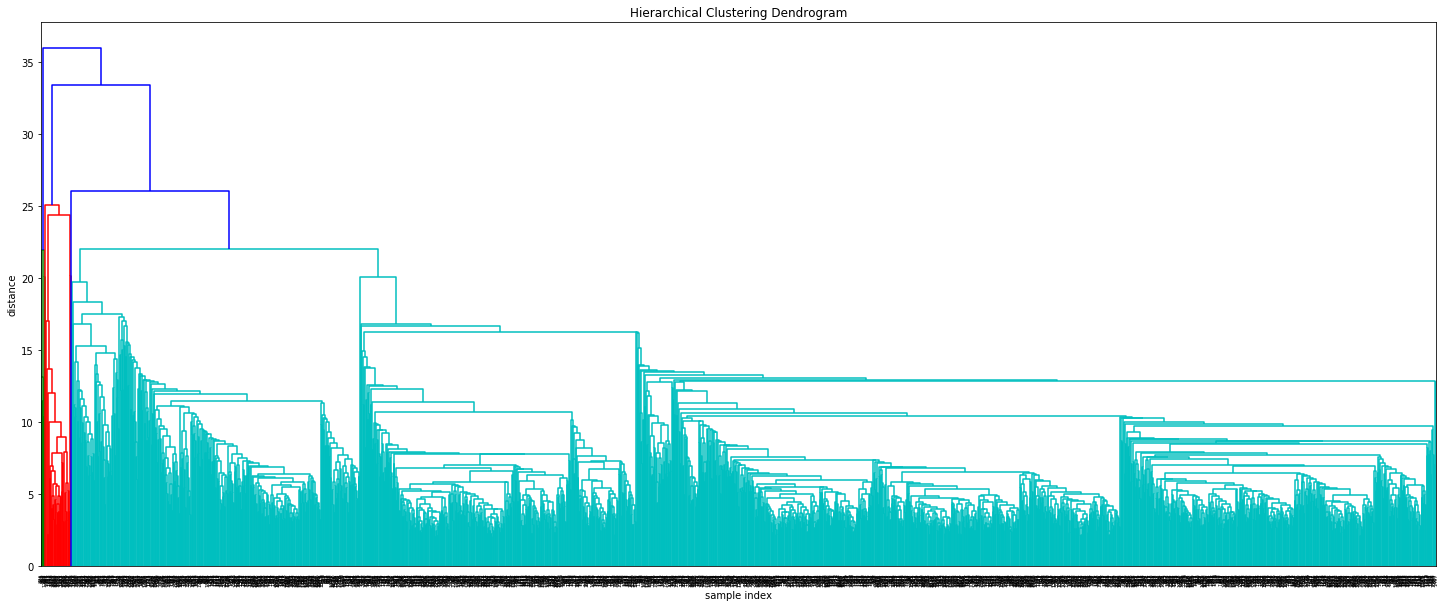

In [40]:
# Perform the hierarchical clustering on patients

from scipy.cluster.hierarchy import dendrogram, linkage


# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
tree = linkage(sample,'average')

dendrogram(tree)
plt.show()

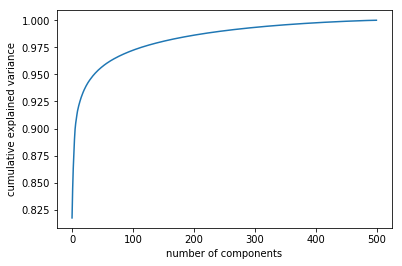

In [42]:
# Perform the PCA analysis on patients. Compute how much of variation is explained by each principle component.

from sklearn.decomposition import PCA

pca = PCA().fit(df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.show()